In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
%matplotlib inline

In [2]:
img = cv2.imread('./test_images/MESSI.jpg')
img.shape

(498, 332, 3)

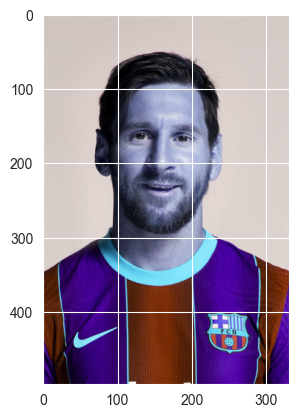

In [3]:
plt.imshow(img)
plt.show()

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(498, 332)

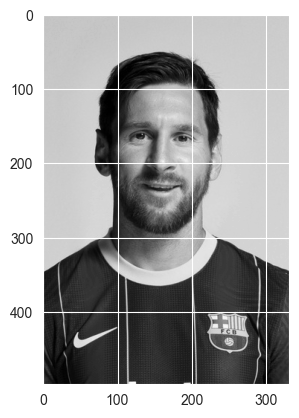

In [5]:
plt.imshow(gray, cmap='gray')
plt.show()

In [6]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascade_eye.xml')

In [7]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[ 80, 102, 162, 162]])

In [8]:
(x, y, w, h) = faces[0]
x, y, w, h

(80, 102, 162, 162)

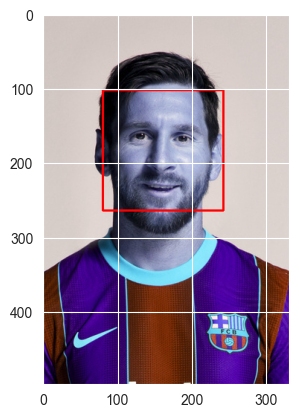

In [9]:
face_img = cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
plt.imshow(face_img)
plt.show()

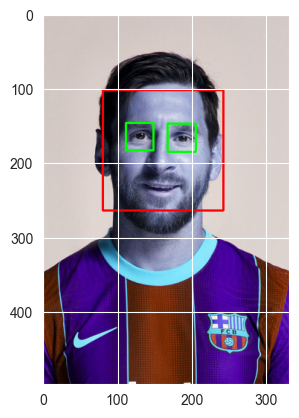

In [10]:
cv2.destroyAllWindows()
for (x, y, w, h) in faces:
    face_img = cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
    roi_gray = gray[y:y + h, x:x + w]
    roi_color = face_img[y:y + h, x:x + w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

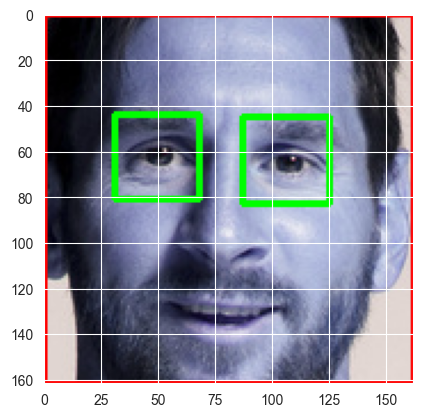

In [11]:
plt.imshow(roi_color, cmap='gray')
plt.show()

In [12]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    if img is None:
        print(f"Failed to load image: {image_path}")
        return None

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x, y, w, h) in faces:
        roi_gray = gray[y:y + h, x:x + w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            roi_color = img[y:y + h, x:x + w]
            return roi_color
    return None

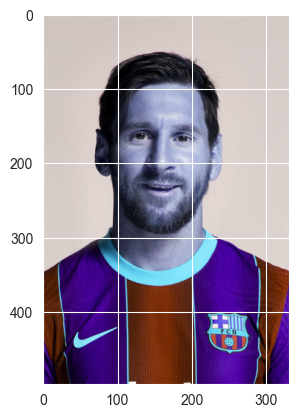

In [13]:
original_image = cv2.imread('./test_images/MESSI.jpg')
plt.imshow(original_image)
plt.show()

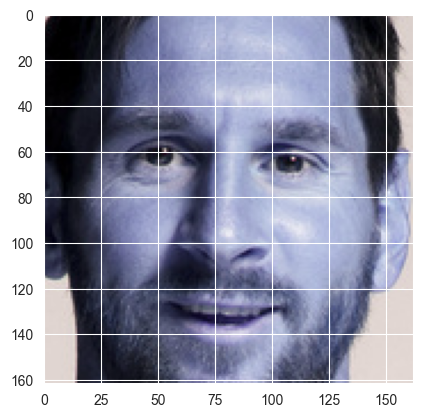

In [14]:
cropped_image = get_cropped_image_if_2_eyes('./test_images/MESSI.jpg')
plt.imshow(cropped_image)
plt.show()

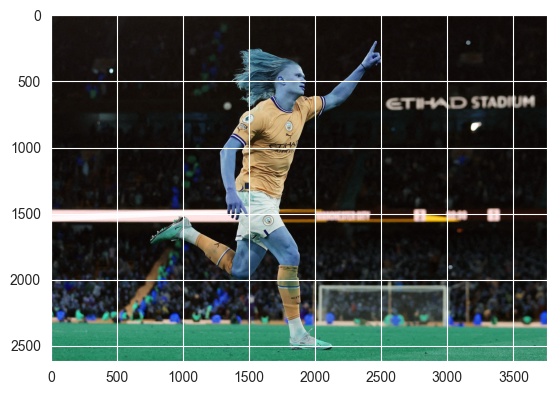

In [15]:
obstructed_img = cv2.imread('./test_images/haland.jpg')
plt.imshow(obstructed_img)
plt.show()

In [16]:
cropped_image_with_no_2_eyes = get_cropped_image_if_2_eyes('./test_images/haland.jpg')
cropped_image_with_no_2_eyes

In [17]:
path_dataset = './dataset/'
path_to_cr_dataset = './dataset/cropped_images/'

In [18]:
import os

img_dirs = []
for entry in os.scandir(path_dataset):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [19]:
img_dirs

['./dataset/cropped_images',
 './dataset/eldor_shomurodov',
 './dataset/erling_haaland',
 './dataset/fayzullaye_abbos',
 './dataset/harry_kane',
 './dataset/lionel_messi']

In [20]:
import shutil

if os.path.exists(path_to_cr_dataset):
    shutil.rmtree(path_to_cr_dataset)
os.mkdir(path_to_cr_dataset)

In [21]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        if entry.is_file():
            roi_color = get_cropped_image_if_2_eyes(entry.path)
            if roi_color is not None:
                cropped_folder = os.path.join(path_to_cr_dataset, celebrity_name)
                if not os.path.exists(cropped_folder):
                    os.makedirs(cropped_folder)
                    cropped_image_dirs.append(cropped_folder)
                    print("Generating cropped images in folder: ", cropped_folder)
                cropped_file_name = f"{celebrity_name}{count}.png"
                cropped_file_path = os.path.join(cropped_folder, cropped_file_name)
                cv2.imwrite(cropped_file_path, roi_color)
                celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
                count += 1

Generating cropped images in folder:  ./dataset/cropped_images/eldor_shomurodov
Generating cropped images in folder:  ./dataset/cropped_images/erling_haaland
Generating cropped images in folder:  ./dataset/cropped_images/fayzullaye_abbos
Generating cropped images in folder:  ./dataset/cropped_images/harry_kane
Generating cropped images in folder:  ./dataset/cropped_images/lionel_messi


In [40]:
import numpy as np
import pywt
import cv2


def w2d(img, mode='haar', level=1):
    imArray = img
    imArray = cv2.cvtColor(imArray, cv2.COLOR_RGB2GRAY)
    imArray = np.float32(imArray)
    imArray /= 255
    coeffs = pywt.wavedec2(imArray, mode, level=level)
    coeffs_H = list(coeffs)
    coeffs_H[0] *= 0
    imArray_H = pywt.waverec2(coeffs_H, mode)
    imArray_H *= 255
    imArray_H = np.uint8(imArray_H)

    return imArray_H


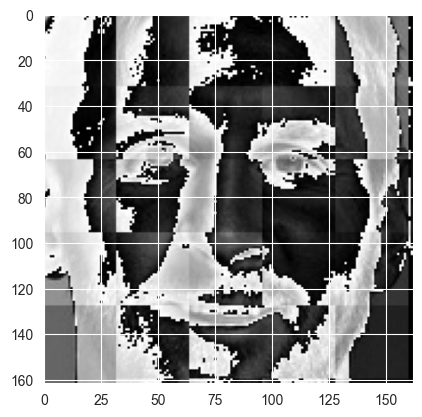

In [41]:
im_har = w2d(cropped_image, 'db1', 5)
plt.imshow(im_har, cmap='gray')
plt.show()

In [42]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'eldor_shomurodov': ['./dataset/cropped_images/eldor_shomurodov\\eldor_shomurodov1.png',
  './dataset/cropped_images/eldor_shomurodov\\eldor_shomurodov10.png',
  './dataset/cropped_images/eldor_shomurodov\\eldor_shomurodov11.png',
  './dataset/cropped_images/eldor_shomurodov\\eldor_shomurodov12.png',
  './dataset/cropped_images/eldor_shomurodov\\eldor_shomurodov14.png',
  './dataset/cropped_images/eldor_shomurodov\\eldor_shomurodov15.png',
  './dataset/cropped_images/eldor_shomurodov\\eldor_shomurodov16.png',
  './dataset/cropped_images/eldor_shomurodov\\eldor_shomurodov17.png',
  './dataset/cropped_images/eldor_shomurodov\\eldor_shomurodov19.png',
  './dataset/cropped_images/eldor_shomurodov\\eldor_shomurodov2.png',
  './dataset/cropped_images/eldor_shomurodov\\eldor_shomurodov20.png',
  './dataset/cropped_images/eldor_shomurodov\\eldor_shomurodov21.png',
  './dataset/cropped_images/eldor_shomurodov\\eldor_shomurodov22.png',
  './dataset/cropped_images/eldor_shomurodov\\eldor_shomuro

In [45]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'eldor_shomurodov': 0,
 'erling_haaland': 1,
 'fayzullaye_abbos': 2,
 'harry_kane': 3,
 'lionel_messi': 4}

In [46]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scaled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img, 'db1', 5)
        scaled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scaled_raw_img.reshape(32 * 32 * 3, 1), scaled_img_har.reshape(32 * 32, 1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

In [47]:
len(X)

121

In [48]:
len(X[0])

4096

In [49]:
32 * 32 * 3 + 32 * 32

4096

In [50]:
X[0]

array([[ 19],
       [ 19],
       [ 21],
       ...,
       [  6],
       [195],
       [191]], dtype=uint8)

In [51]:
y[0]

0

In [52]:
X = np.array(X).reshape(len(X), 4096).astype(float)
X.shape

(121, 4096)

In [53]:
X[0]

array([ 19.,  19.,  21., ...,   6., 195., 191.])

In [57]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel='rbf', C=10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.8709677419354839

In [59]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.89      0.89      0.89         9
           2       0.80      1.00      0.89         8
           3       1.00      1.00      1.00         1
           4       0.80      0.57      0.67         7

    accuracy                           0.87        31
   macro avg       0.90      0.89      0.89        31
weighted avg       0.87      0.87      0.86        31



In [60]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [63]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto', probability=True),
        'params': {
            'svc__C': [1, 10, 100, 1000],
            'svc__kernel': ['rbf', 'linear']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'randomforestclassifier__n_estimators': [1, 5, 10]
        }
    },
    'logistic_regression': {
        'model': LogisticRegression(solver='liblinear', multi_class='auto'),
        'params': {
            'logisticregression__C': [1, 5, 10]
        }
    }
}

In [65]:
scores = []
best_estimators = {}
import pandas as pd

for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf = GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_

df = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
df

C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\user\AppData\Local\Programs\Python\Pytho

,model,best_score,best_params
0,svm,0.822222,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.655556,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.811111,{'logisticregression__C': 1}


In [71]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, multi_class='auto',
                                     solver='liblinear'))])}

In [72]:
best_estimators['svm'].score(X_test, y_test)

0.9032258064516129

In [73]:
best_estimators['logistic_regression'].score(X_test, y_test)

0.8064516129032258

In [74]:
best_clf = best_estimators['svm']

In [75]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[6, 0, 0, 0, 0],
       [0, 8, 0, 0, 1],
       [0, 0, 8, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 1, 1, 5]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

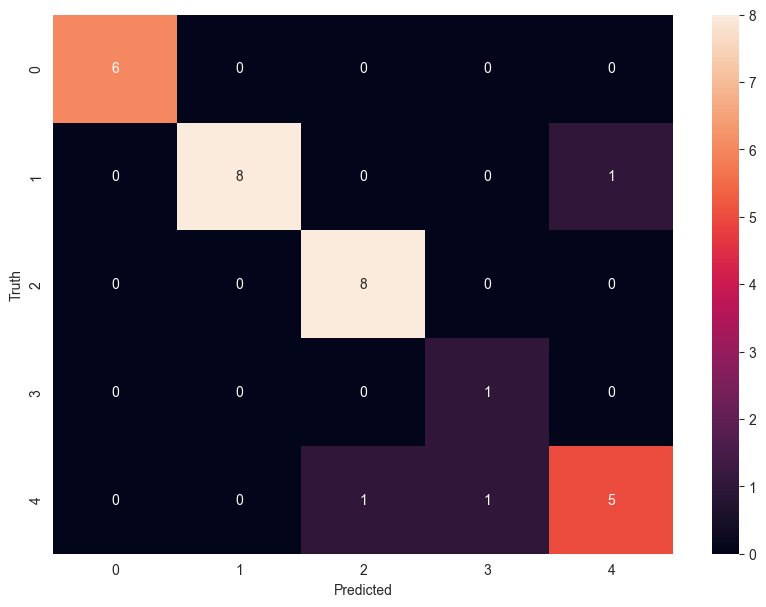

In [76]:
import seaborn as sn

plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [78]:
class_dict

{'eldor_shomurodov': 0,
 'erling_haaland': 1,
 'fayzullaye_abbos': 2,
 'harry_kane': 3,
 'lionel_messi': 4}

In [79]:
import joblib

joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

In [80]:
import json

with open("class_dictionary.json", "w") as f:
    f.write(json.dumps(class_dict))